# ANÁLISIS DE COVID-19 TWEETS 2

## Importación de las librerias

In [44]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

print('Setup complete.')

Setup complete.


## Visualización del dataset

In [45]:
df_tweets = pandas.read_csv('data/vaccination_all_tweets.csv')

In [46]:
df_tweets.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [47]:
round(df_tweets.describe(), 2)

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,2.282070e+05,228207.00,228207.00,228207.00,228207.00,228207.00
mean,1.407541e+18,96053.93,986.74,12104.17,2.49,10.82
std,2.908485e+16,838905.31,5293.50,39082.33,51.08,199.53
min,1.337728e+18,0.00,0.00,0.00,0.00,0.00
25%,1.381940e+18,55.00,27.00,57.00,0.00,0.00
50%,1.408133e+18,328.00,229.00,996.00,0.00,0.00
75%,1.428688e+18,1521.00,794.00,7300.00,1.00,2.00
max,1.463251e+18,16353048.00,582461.00,1299600.00,12294.00,54017.00


In [48]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228207 entries, 0 to 228206
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                228207 non-null  int64 
 1   user_name         228205 non-null  object
 2   user_location     161296 non-null  object
 3   user_description  211189 non-null  object
 4   user_created      228207 non-null  object
 5   user_followers    228207 non-null  int64 
 6   user_friends      228207 non-null  int64 
 7   user_favourites   228207 non-null  int64 
 8   user_verified     228207 non-null  bool  
 9   date              228207 non-null  object
 10  text              228207 non-null  object
 11  hashtags          178504 non-null  object
 12  source            228088 non-null  object
 13  retweets          228207 non-null  int64 
 14  favorites         228207 non-null  int64 
 15  is_retweet        228207 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory

In [49]:
df_tweets['date'] = df_tweets['date'].astype('datetime64')

## Limpieza del dataset

In [50]:
df_tweets.drop(columns=['id'], inplace=True)

In [51]:
df_tweets.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [52]:
df_tweets.isnull().sum()

user_name               2
user_location       66911
user_description    17018
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            49703
source                119
retweets                0
favorites               0
is_retweet              0
dtype: int64

In [53]:
df_tweets_f2 = df_tweets.dropna()

In [54]:
df_tweets_f2.isnull().values.any()

False

In [55]:
total_duplicates = df_tweets_f2.duplicated().sum()
if total_duplicates == 0:
    print('No hay datos duplicados.')
else:
    print('Total duplicados:', total_duplicates)

No hay datos duplicados.


In [56]:
print('Total:', df_tweets_f2.shape[0]) # SOLO FILAS [0]
print('Antes de eliminar:', df_tweets.shape[0])

Total: 116057
Antes de eliminar: 228207


## Análisis mediante gráficas

In [57]:
df_tweets_f2.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
2,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
6,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False
9,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False
10,Tamer Yazar,Turkey-Israel,"Im Market Analyst, also Editor... working (fre...",2009-09-17 16:45:16,1302,78,339,False,2020-12-12 19:29:07,"while deaths are closing in on the 300,000 mar...","['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False


### Tweets por día

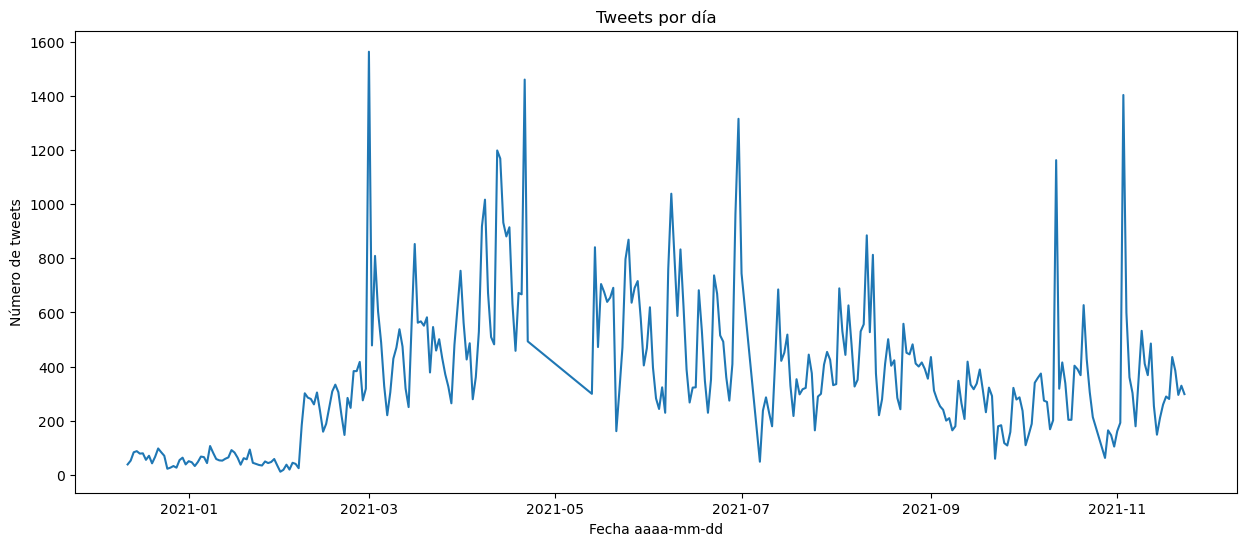

In [58]:
counts = df_tweets_f2.groupby(df_tweets_f2['date'].dt.date)['text'].count() #mediante groupby agrupamos por fecha y contamos el número de tweets

plt.figure(figsize=(15, 6))
plt.plot(counts.index, counts.values)
plt.xlabel('Fecha aaaa-mm-dd')
plt.ylabel('Número de tweets')
plt.title('Tweets por día')
plt.savefig('imagenes/recuentos_tweets_2.png')
plt.show()

### Hashtags más utilizados

In [59]:
hashtag_counts = df_tweets_f2['hashtags'].value_counts()
print(hashtag_counts)

['Moderna']                                                         8173
['Covaxin']                                                         6543
['SputnikV']                                                        3979
['COVAXIN']                                                         3199
['BBMP', 'Bengaluru', 'CovidVaccine', 'COVISHIELD']                 2922
                                                                    ... 
['Sinovac', 'Shanghai', 'antibodies']                                  1
['Covid_19', 'Turkey']                                                 1
['Sinovac', 'COVID19', 'vaccine', 'Cambodia']                          1
['FullyVaccinated', 'Sinovac', 'resbakuna', 'ProudValenzuelano']       1
['Antibodies', 'COVID19', 'vaccines', 'Mongolia', 'Pfizer']            1
Name: hashtags, Length: 44911, dtype: int64


In [60]:
top_hashtags = hashtag_counts[:10]

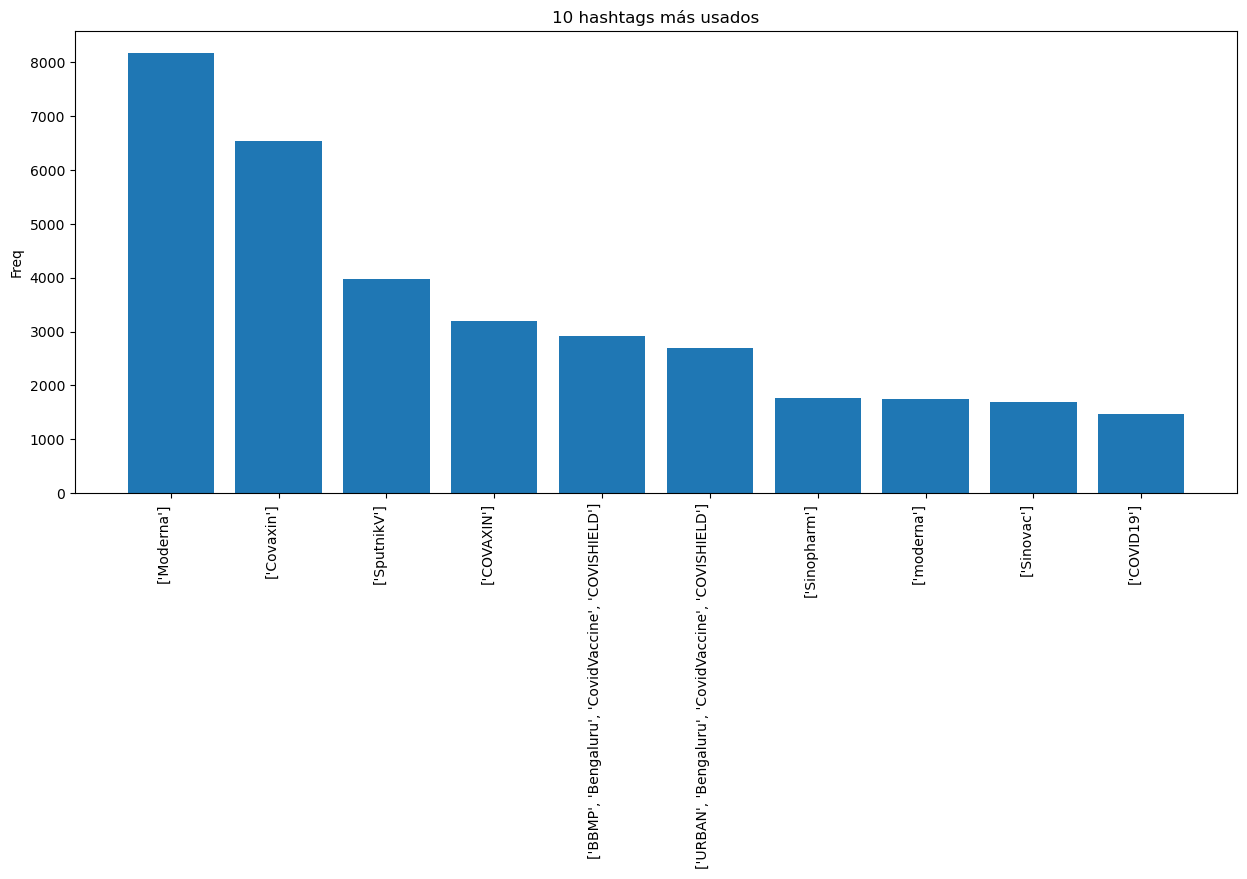

In [61]:
fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(top_hashtags.index, top_hashtags.values)

ax.set_title('10 hashtags más usados')
ax.set_ylabel('Freq')
plt.xticks(rotation=90, ha="right")
plt.savefig('imagenes/hashtags_usados_2.png')

plt.show()

## Árbol de decisión

### Variables contínuas

In [62]:
v_continuas = []
v_categorica = []
for x in df_tweets_f2:
  if len(df_tweets_f2[x].unique())>25:
    v_continuas.append(x)
  else:
    v_categorica.append(x)
print('Variables continuas: {}'.format(v_continuas))
print('Variables categóricas: {}'.format(v_categorica))

Variables continuas: ['user_name', 'user_location', 'user_description', 'user_created', 'user_followers', 'user_friends', 'user_favourites', 'date', 'text', 'hashtags', 'source', 'retweets', 'favorites']
Variables categóricas: ['user_verified', 'is_retweet']


In [63]:
target = 'is_retweet' #variable objetivo, pongamos por ejemplo que queremos predecir si un tweet es un retweet o no
features = df_tweets_f2.select_dtypes(include=['float64', 'int64']) #seleccionamos las variables numéricas
features = features.columns.tolist()

print(f'Variable objetivo: {target} \nVariables predictoras: {features}')

Variable objetivo: is_retweet 
Variables predictoras: ['user_followers', 'user_friends', 'user_favourites', 'retweets', 'favorites']


In [64]:
from sklearn.tree import DecisionTreeRegressor

arbol_importancia = DecisionTreeRegressor(max_depth=len(features)+10, random_state=100)

arbol_importancia.fit(X=df_tweets_f2[features], y=df_tweets_f2[target])

DecisionTreeRegressor(max_depth=15, random_state=100)

In [65]:
# Comprobamos que se obtiene un R^2 muy alto. Lo desesable es que sea 1.
y_pred_arbol = arbol_importancia.predict(X=df_tweets_f2[features])

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(df_tweets_f2[target], y_pred_arbol))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(df_tweets_f2[target], y_pred_arbol)*100)
print('Mean Squared Error:', mean_squared_error(df_tweets_f2[target], y_pred_arbol))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(df_tweets_f2[target], y_pred_arbol)))
print('R^2 coefficient of determination:', r2_score(df_tweets_f2[target], y_pred_arbol))

Mean Absolute Error: 0.0
Mean Absolute Percentage Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
R^2 coefficient of determination: 1.0


Dataset perfecto